In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape

(42000, 785)

In [4]:
test=pd.read_csv('test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.shape

(28000, 784)

In [6]:
test.shape[0]

28000

In [7]:
x_train=train.drop(['label'],axis=1)

In [8]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_train=x_train.to_numpy()

In [10]:
x_train.shape

(42000, 784)

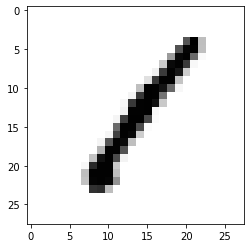

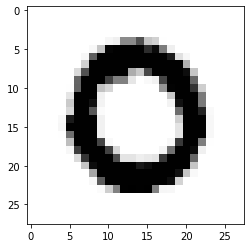

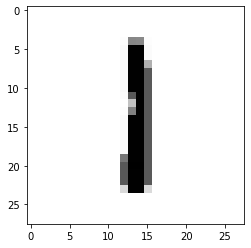

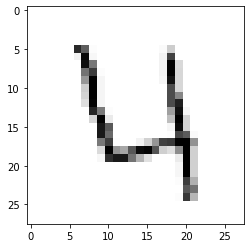

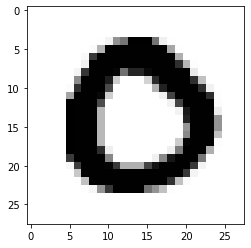

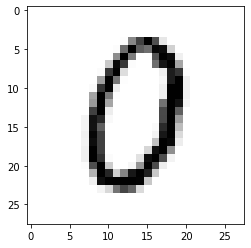

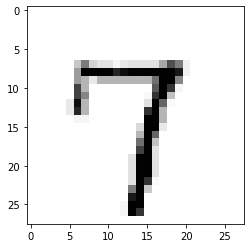

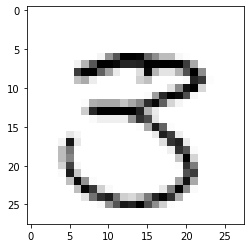

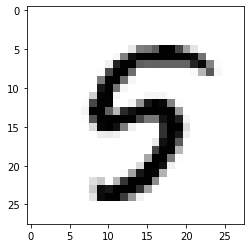

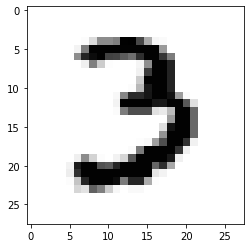

In [11]:
for i in range(10):
    img = x_train[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()


In [12]:
x_train=x_train.reshape(42000,28,28,1)

In [13]:
x_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [14]:
x_test=test.to_numpy()

In [15]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [17]:
y_train=train['label']

In [18]:
y_train=y_train.to_numpy()

In [19]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [20]:
import tensorflow as tf
import keras
from keras.models import Sequential,Model,load_model,model_from_json
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,Add,Input,Activation
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [21]:
x_train=x_train/255
x_test=x_test/255

In [22]:
y_train = keras.utils.to_categorical(y_train, 10)

In [23]:
def data_augumentation(x_data,y_data,batch_size):
    datagen=ImageDataGenerator(rotation_range=5,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.1)
    datagen.fit(x_data)
    train=datagen.flow(x_data,y_data,batch_size=batch_size)
    return train
    

In [24]:
def model(input_shape = (28,28,1), classes = 10):
    X_input = Input(input_shape)
    
    X = Conv2D(filters=6, kernel_size= (5,5), strides=1, padding='same',name = 'CONV-Layer-1', kernel_initializer=glorot_uniform(seed = 0))(X_input)
    X = BatchNormalization(axis = 3, name = 'BatchN-Layer-1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D(pool_size=(2,2), strides=2, padding='valid', name = 'Padding-Layer-1')(X)
    
    X = Dropout(0.25)(X)
    
    X = Conv2D(16, kernel_size=(5,5), strides=1, padding = 'valid', name = 'CONV-Layer-2', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')(X)
    
    X = Flatten()(X)
    X = Dense(120, activation='relu',kernel_initializer=glorot_uniform(seed = 0))(X)
    X = Dropout(0.5)(X)
    X = Dense(84, activation='relu',kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization()(X)
    X = Dense(64, activation='relu',kernel_initializer=glorot_uniform(seed = 0))(X)
    X = Dropout(0.5)(X)
    X = Dense(32, activation='relu',kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization()(X)
    X = Dense(16, activation='relu',kernel_initializer=glorot_uniform(seed = 0))(X)
    X = Dense(classes, activation = 'softmax', kernel_initializer=glorot_uniform(seed = 0))(X)
   
    model = Model(inputs = X_input, outputs = X, name = "LeNet - Partial")
    
    return model

In [25]:
model=model()

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
aug_train_data = data_augumentation(x_train, y_train, 64)

In [28]:
aug_train_data

In [29]:
model.fit(aug_train_data,epochs=500,steps_per_epoch=int(len(x_train)/64))

Epoch 1/500
656/656 [==============================] - 15s 22ms/step - loss: 1.6679 - accuracy: 0.4105
Epoch 2/500
656/656 [==============================] - 16s 24ms/step - loss: 0.6744 - accuracy: 0.7855
Epoch 3/500
656/656 [==============================] - 14s 22ms/step - loss: 0.4504 - accuracy: 0.8650
Epoch 4/500
656/656 [==============================] - 14s 21ms/step - loss: 0.3635 - accuracy: 0.8958
Epoch 5/500
656/656 [==============================] - 14s 21ms/step - loss: 0.3148 - accuracy: 0.9131
Epoch 6/500
656/656 [==============================] - 14s 22ms/step - loss: 0.2896 - accuracy: 0.9209
Epoch 7/500
656/656 [==============================] - 14s 21ms/step - loss: 0.2667 - accuracy: 0.9285
Epoch 8/500
656/656 [==============================] - 14s 22ms/step - loss: 0.2408 - accuracy: 0.9370
Epoch 9/500
656/656 [==============================] - 14s 22ms/step - loss: 0.2246 - accuracy: 0.9398
Epoch 10/500
656/656 [==============================] - 14s 21ms/step - l

656/656 [==============================] - 15s 23ms/step - loss: 0.0959 - accuracy: 0.9736
Epoch 80/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0934 - accuracy: 0.9747
Epoch 81/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0954 - accuracy: 0.9756
Epoch 82/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0978 - accuracy: 0.9743
Epoch 83/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0926 - accuracy: 0.9748
Epoch 84/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0875 - accuracy: 0.9762
Epoch 85/500
656/656 [==============================] - 15s 22ms/step - loss: 0.0936 - accuracy: 0.9747
Epoch 86/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0934 - accuracy: 0.9752
Epoch 87/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0893 - accuracy: 0.9764
Epoch 88/500
656/656 [==============================] - 15s 23ms/step - loss:

656/656 [==============================] - 51s 77ms/step - loss: 0.0782 - accuracy: 0.9784
Epoch 157/500
656/656 [==============================] - 52s 79ms/step - loss: 0.0830 - accuracy: 0.9778
Epoch 158/500
656/656 [==============================] - 51s 78ms/step - loss: 0.0787 - accuracy: 0.9789
Epoch 159/500
656/656 [==============================] - 49s 74ms/step - loss: 0.0813 - accuracy: 0.9778
Epoch 160/500
656/656 [==============================] - 48s 74ms/step - loss: 0.0789 - accuracy: 0.9789
Epoch 161/500
656/656 [==============================] - 47s 71ms/step - loss: 0.0788 - accuracy: 0.9787
Epoch 162/500
656/656 [==============================] - 47s 71ms/step - loss: 0.0797 - accuracy: 0.9783
Epoch 163/500
656/656 [==============================] - 49s 75ms/step - loss: 0.0823 - accuracy: 0.9777
Epoch 164/500
656/656 [==============================] - 50s 77ms/step - loss: 0.0776 - accuracy: 0.9786
Epoch 165/500
656/656 [==============================] - 52s 79ms/ste

656/656 [==============================] - 14s 22ms/step - loss: 0.0740 - accuracy: 0.9796
Epoch 235/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0784 - accuracy: 0.9782
Epoch 236/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0783 - accuracy: 0.9793
Epoch 237/500
656/656 [==============================] - 15s 22ms/step - loss: 0.0755 - accuracy: 0.9788
Epoch 238/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0754 - accuracy: 0.9794
Epoch 239/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0730 - accuracy: 0.9798
Epoch 240/500
656/656 [==============================] - 15s 22ms/step - loss: 0.0744 - accuracy: 0.9802
Epoch 241/500
656/656 [==============================] - 16s 24ms/step - loss: 0.0740 - accuracy: 0.9797
Epoch 242/500
656/656 [==============================] - 15s 22ms/step - loss: 0.0761 - accuracy: 0.9792
Epoch 243/500
656/656 [==============================] - 15s 22ms/ste

656/656 [==============================] - 14s 22ms/step - loss: 0.0698 - accuracy: 0.9810
Epoch 313/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0687 - accuracy: 0.9817
Epoch 314/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0732 - accuracy: 0.9803
Epoch 315/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0719 - accuracy: 0.9805
Epoch 316/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0720 - accuracy: 0.9806
Epoch 317/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0698 - accuracy: 0.9812
Epoch 318/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0717 - accuracy: 0.9805
Epoch 319/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0696 - accuracy: 0.9804
Epoch 320/500
656/656 [==============================] - 14s 22ms/step - loss: 0.0686 - accuracy: 0.9808
Epoch 321/500
656/656 [==============================] - 14s 22ms/ste

656/656 [==============================] - 15s 23ms/step - loss: 0.0663 - accuracy: 0.9812
Epoch 391/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0669 - accuracy: 0.9822
Epoch 392/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0701 - accuracy: 0.9806
Epoch 393/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0681 - accuracy: 0.9811
Epoch 394/500
656/656 [==============================] - 18s 27ms/step - loss: 0.0701 - accuracy: 0.9808
Epoch 395/500
656/656 [==============================] - 16s 24ms/step - loss: 0.0697 - accuracy: 0.9813
Epoch 396/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0682 - accuracy: 0.9809
Epoch 397/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0655 - accuracy: 0.9824
Epoch 398/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0683 - accuracy: 0.9808
Epoch 399/500
656/656 [==============================] - 15s 23ms/ste

656/656 [==============================] - 15s 22ms/step - loss: 0.0649 - accuracy: 0.9823
Epoch 468/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0648 - accuracy: 0.9818
Epoch 469/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0698 - accuracy: 0.9814
Epoch 470/500
656/656 [==============================] - 15s 22ms/step - loss: 0.0651 - accuracy: 0.9813
Epoch 471/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0688 - accuracy: 0.9808
Epoch 472/500
656/656 [==============================] - 15s 24ms/step - loss: 0.0673 - accuracy: 0.9824
Epoch 473/500
656/656 [==============================] - 15s 23ms/step - loss: 0.0688 - accuracy: 0.9808
Epoch 474/500
656/656 [==============================] - 16s 24ms/step - loss: 0.0662 - accuracy: 0.9816
Epoch 475/500
656/656 [==============================] - 15s 24ms/step - loss: 0.0659 - accuracy: 0.9821
Epoch 476/500
656/656 [==============================] - 15s 23ms/ste

In [30]:
model.summary()

Model: "LeNet - Partial"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
CONV-Layer-1 (Conv2D)        (None, 28, 28, 6)         156       
_________________________________________________________________
BatchN-Layer-1 (BatchNormali (None, 28, 28, 6)         24        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
Padding-Layer-1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
CONV-Layer-2 (Conv2D)        (None, 10, 10, 16)    

In [31]:
y_test=model.predict(x_test)

In [32]:
y_test

array([[1.6953163e-07, 1.0592848e-06, 9.9994743e-01, ..., 1.8861954e-05,
        3.5136970e-06, 2.4721862e-07],
       [9.9967897e-01, 4.2072577e-07, 2.2302193e-05, ..., 1.5576678e-06,
        1.6526530e-05, 1.9314961e-04],
       [4.6113568e-05, 5.4240470e-05, 7.2519986e-05, ..., 2.3240314e-03,
        1.7038940e-03, 9.8935705e-01],
       ...,
       [3.8944924e-07, 7.0304532e-07, 1.2258698e-04, ..., 3.9348684e-05,
        1.1486261e-05, 4.5317038e-06],
       [9.3717181e-06, 1.0302168e-05, 1.5670146e-05, ..., 9.5705775e-04,
        4.7455417e-04, 9.9553347e-01],
       [3.4185959e-08, 3.9032452e-07, 9.9997830e-01, ..., 5.9833610e-06,
        1.5189602e-06, 6.2374724e-08]], dtype=float32)

In [33]:
y_test.shape

(28000, 10)

In [34]:
results = np.argmax(y_test,axis = 1)
results = pd.Series(results,name="Label")
results.shape

(28000,)

In [35]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv('data.csv',index=False)